In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2
from scipy.special import stdtr
from scipy.stats import t
from matplotlib.widgets import Slider, Button
%matplotlib notebook

The Student's T distribution is used in cases where we do not have enough samples to invoke the CLT or the LLN, or Slutsky's.  For the Student's T we instead assume that our statistic is already Gaussian (which is true enough surprisingly often).  Here is a little widget that let's you get a sense of what the degrees of freedom does to the shape of the distribution and how it converges to the standard Gaussian as the number of degrees of freedom increases.  Notice how in small degrees of freedom the distribution favours the tails, and how as the degrees of freedom increases the Student's T approaches the standard Gaussian.

<IPython.core.display.Javascript object>


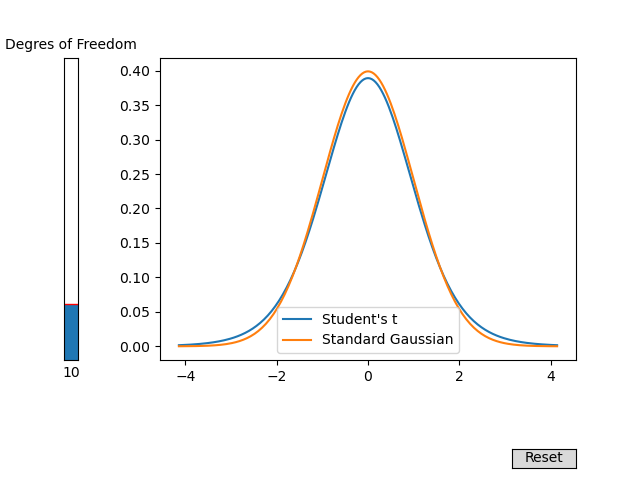

In [40]:
fig, ax = plt.subplots(1,1)

df_0 = 10

fig.subplots_adjust(left=0.25, bottom=0.25)
axdf = fig.add_axes([0.1, 0.25, 0.0225, 0.63])

df_slider = Slider(
    ax=axdf,
    label='Degres of Freedom',
    valmin=1,
    valmax=50,
    valinit=df_0,
    orientation="vertical",
    valfmt="%0.0f"
)

x=np.linspace(t.ppf(0.001,df_slider.val), t.ppf(0.999,df_slider.val), 201)
line, = ax.plot(x,t.pdf(x,df_0),label="Student's t")

# for comparison purposes we draw in a standard Gaussian
gaussian, = ax.plot(x,norm.pdf(x,0,1), label="Standard Gaussian")
ax.legend()

def update(val):
    # sequence of x values to use for plotting
#    x=np.linspace(norm.ppf(0.01, df_slider.val), norm.ppf(0.99, df_slider.val),201)
    line.set_ydata(t.pdf(x,df_slider.val))
#    ax.set_ylim([0,chi2.cdf(chi2.ppf(0.01, 1),1)])
    fig.canvas.draw_idle()
    
def reset(event):
    df_slider.reset()

resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, "Reset", hovercolor="0.975")

button.on_clicked(reset)
df_slider.on_changed(update)
plt.show()

We are asked to compute the p-value for the following test:

$$H_0: \mu=1$$
$$H_1: \mu\ne 1$$

With the following data

$$\bar{X}_n = 1.2$$
$$n = 8$$
$$S_n = 0.27$$

For the test statistic

$$T_n = \sqrt{n}\left( \frac{\bar{X}_n - \mu_0}{S_n}\right)$$

We note that we are in the regieme of a two sided test.  Here is a quick picture of what we are looking for:

<IPython.core.display.Javascript object>


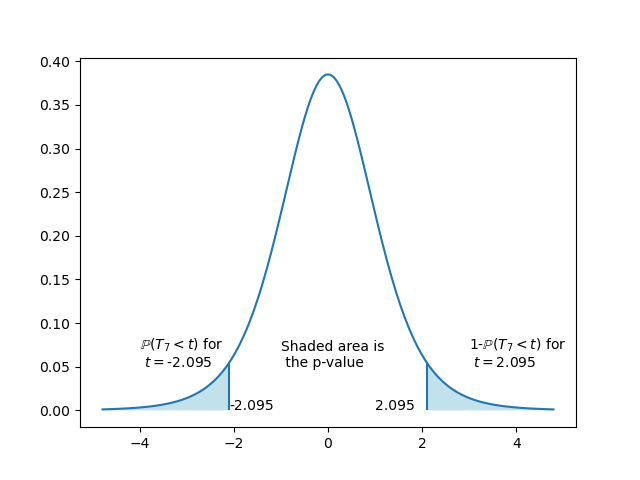

In [82]:
fig, ax = plt.subplots(1,1)

# we have 8 data points so the degrees of freedom is 7
df = 7
mu_0 = 1
x_bar_n = 1.2
S_n = 0.27
 
# our test statistic is 
t_n = ((df+1)**0.5)*((x_bar_n - mu_0)/S_n)
# we plot lines at the boundary points
ax.vlines([-t_n,t_n], 0, t.pdf(t_n,df))

x=np.linspace(t.ppf(0.001,df), t.ppf(0.999,df), 201)
line, = ax.plot(x,t.pdf(x,df),label="Student's t\n" + str(df) + " degrees of freedom" )
x_left=np.linspace(x[0],-t_n,201)
ax.fill_between(x_left, t.pdf(x_left,df), alpha=0.75, facecolor='lightblue')
x_right=np.linspace(t_n, x[200],201)
ax.fill_between(x_right, t.pdf(x_right,df), alpha=0.75, facecolor='lightblue')
plt.text(-1,0.05,"Shaded area is\n the p-value")
plt.text(-t_n,0,str(round(-t_n,3)))
plt.text(1,0,str(round(t_n,3)))
plt.annotate("$\mathbb{P}(T_7<t)$ for\n $t=$" + str(round(-t_n,3)),(-3,0.01),(-4,0.05))
plt.annotate("1-$\mathbb{P}(T_7<t)$ for\n $t=$" + str(round(t_n,3)),(3,0.01),(3,0.05))
plt.show()

In [79]:
t_n=(8**0.5)*((1.2 -1)/0.27)
p_value=2*t.cdf(-t_n,7)
print("Value of test statistic: " + str(round(t_n,3)))
print("p-value based on Student's T distribution with 7 degrees of freedom: " + str(round(p_value,3)))

Value of test statistic: 2.095
p-value based on Student's T distribution with 7 degrees of freedom: 0.074


Next we are asked to consider the test:

$$H_0: \mu\le3.5$$
$$H_1: \mu\gt 3.5$$

With the following data

$$\bar{X}_n = 5.2$$
$$n = 16$$
$$S_n = 2.8$$

In this case we have a one sided test.  Here is the picture:

<IPython.core.display.Javascript object>


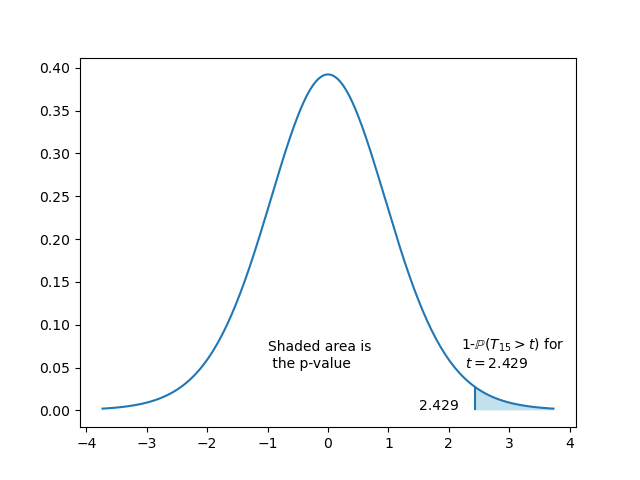

In [92]:
fig, ax = plt.subplots(1,1)

# we have 8 data points so the degrees of freedom is 7
mu_0 = 3.5
df = 15
x_bar_n = 5.2
S_n = 2.8
 
# our test statistic is 
t_n = ((df+1)**0.5)*((x_bar_n - mu_0)/S_n)
# we plot lines at the boundary points
ax.vlines([t_n], 0, t.pdf(t_n,df))

x=np.linspace(t.ppf(0.001,df), t.ppf(0.999,df), 201)
line, = ax.plot(x,t.pdf(x,df),label="Student's t\n" + str(df) + " degrees of freedom" )
x_right=np.linspace(t_n, x[200],201)
ax.fill_between(x_right, t.pdf(x_right,df), alpha=0.75, facecolor='lightblue')
plt.text(-1,0.05,"Shaded area is\n the p-value")
plt.text(1.5,0,str(round(t_n,3)))
plt.annotate("1-$\mathbb{P}(T_{15}>t)$ for\n $t=$" + str(round(t_n,3)),(3,0.01),(2.2,0.05))
plt.show()

In [93]:
t_n=(16**0.5)*((5.2 -3.5)/2.8)
p_value=2*t.cdf(t_n,15)
print("Value of test statistic: " + str(round(t_n,3)))
print("p-value based on Student's T distribution with 7 degrees of freedom: " + str(round(p_value,3)))

Value of test statistic: 2.429
p-value based on Student's T distribution with 7 degrees of freedom: 1.972


In the next two questions we have that $X_1, ..., X_n \overset{\text{iid}}{\sim} \mathcal{N}(\mu,\sigma^2)$.  Both parameters are unknown.  Compute the p-value in each case.

$$H_0: \mu\ge 50$$
$$H_1: \mu\lt 50$$

With the following data

$$\bar{X}_n = 36.1$$
$$n = 4$$
$$S_n = 8.6$$

And 

$$H_0: \mu=-6$$
$$H_1: \mu\ne -6$$

With the following data

$$\bar{X}_n = 1.2$$
$$n = 3$$
$$X_1=-3.81, X_2=-4.40, X_3=-0.93$$

We look at the second case.

<IPython.core.display.Javascript object>


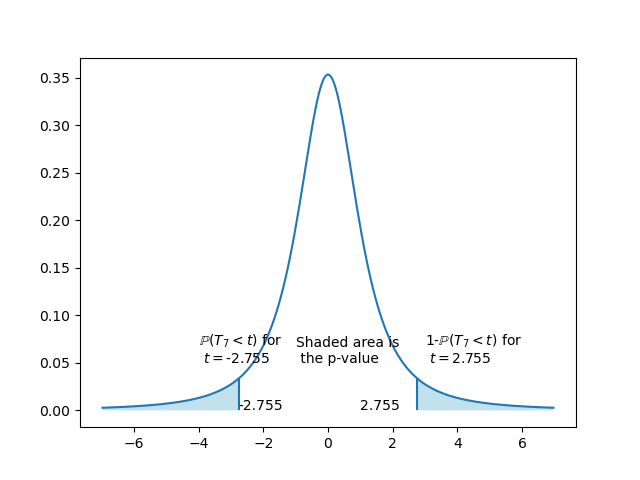

In [103]:
fig, ax = plt.subplots(1,1)

X_n = [-3.81, -4.40, -0.93]
df = 2
mu_0 = -6
x_bar_n = np.mean(X_n)
S_n = np.std(X_n,ddof=1)
 
# our test statistic is 
t_n = ((df+1)**0.5)*((x_bar_n - mu_0)/S_n)
# we plot lines at the boundary points
ax.vlines([-t_n,t_n], 0, t.pdf(t_n,df))

x=np.linspace(t.ppf(0.01,df), t.ppf(0.99,df), 201)
line, = ax.plot(x,t.pdf(x,df),label="Student's t\n" + str(df) + " degrees of freedom" )
x_left=np.linspace(x[0],-t_n,201)
ax.fill_between(x_left, t.pdf(x_left,df), alpha=0.75, facecolor='lightblue')
x_right=np.linspace(t_n, x[200],201)
ax.fill_between(x_right, t.pdf(x_right,df), alpha=0.75, facecolor='lightblue')
plt.text(-1,0.05,"Shaded area is\n the p-value")
plt.text(-t_n,0,str(round(-t_n,3)))
plt.text(1,0,str(round(t_n,3)))
plt.annotate("$\mathbb{P}(T_7<t)$ for\n $t=$" + str(round(-t_n,3)),(-3,0.01),(-4,0.05))
plt.annotate("1-$\mathbb{P}(T_7<t)$ for\n $t=$" + str(round(t_n,3)),(3,0.01),(3,0.05))
plt.show()

In [102]:
p_value=2*t.cdf(-2.755,2)
print("Value of test statistic: " + str(round(t_n,3)))
print("p-value based on Student's T distribution with 2 degrees of freedom: " + str(round(p_value,5)))

Value of test statistic: 2.755
p-value based on Student's T distribution with 2 degrees of freedom: 0.11037


In the first case we have

<IPython.core.display.Javascript object>


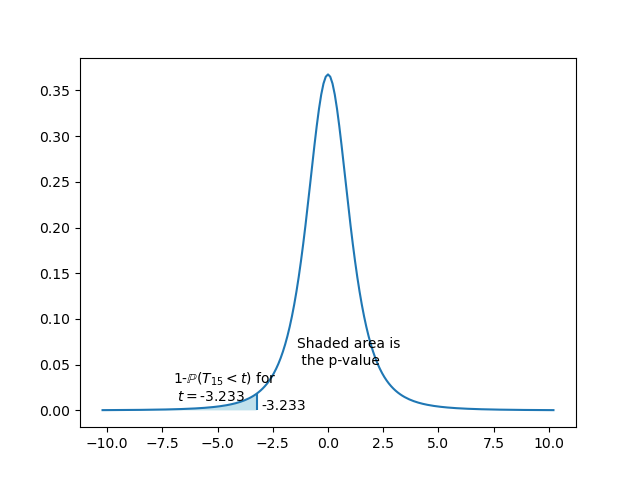

In [122]:
fig, ax = plt.subplots(1,1)

mu_0 = 50
df = 3
x_bar_n = 36.1
S_n = 8.6
 
# our test statistic is 
t_n = ((df+1)**0.5)*((x_bar_n - mu_0)/S_n)
# we plot lines at the boundary points
ax.vlines([t_n], 0, t.pdf(t_n,df))

x=np.linspace(t.ppf(0.001,df), t.ppf(0.999,df), 201)
line, = ax.plot(x,t.pdf(x,df),label="Student's t\n" + str(df) + " degrees of freedom" )
x_left=np.linspace(x[0], t_n ,201)
ax.fill_between(x_left, t.pdf(x_left,df), alpha=0.75, facecolor='lightblue')
plt.text(-1.4,0.05,"Shaded area is\n the p-value")
plt.text(t_n + 0.2,0,str(round(t_n,3)))
plt.annotate("1-$\mathbb{P}(T_{15}< t)$ for\n $t=$" + str(round(t_n,3)),(-6,0.01),(-7,0.01))
plt.show()

In [123]:
p_value=t.cdf(-3.233,3)
print("Value of test statistic: " + str(round(t_n,3)))
print("p-value based on Student's T distribution with 2 degrees of freedom: " + str(round(p_value,5)))

Value of test statistic: -3.233
p-value based on Student's T distribution with 2 degrees of freedom: 0.02405
